In [13]:
import json
import os
import re
import traceback

import datasets
import matplotlib.pyplot as plt
import pandas as pd
import plotly.express as px
import seaborn as sns
from matplotlib.collections import PatchCollection
from matplotlib.patches import Polygon

In [2]:
data_dir = "./data"

# Excercise 2 a)

loading the dataset:

In [3]:
unemployed = pd.read_csv(os.path.join(data_dir, "unemployment analysis.csv"))

## 2 b)

printing the dataset:

In [4]:
unemployed

,Country Name,Country Code,1991,1992,1993,1994,1995,1996,1997,1998,...,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021
0,Africa Eastern and Southern,AFE,7.80,7.84,7.85,7.84,7.83,7.84,7.86,7.81,...,6.56,6.45,6.41,6.49,6.61,6.71,6.73,6.91,7.56,8.11
1,Afghanistan,AFG,10.65,10.82,10.72,10.73,11.18,10.96,10.78,10.80,...,11.34,11.19,11.14,11.13,11.16,11.18,11.15,11.22,11.71,13.28
2,Africa Western and Central,AFW,4.42,4.53,4.55,4.54,4.53,4.57,4.60,4.66,...,4.64,4.41,4.69,4.63,5.57,6.02,6.04,6.06,6.77,6.84
3,Angola,AGO,4.21,4.21,4.23,4.16,4.11,4.10,4.09,4.07,...,7.35,7.37,7.37,7.39,7.41,7.41,7.42,7.42,8.33,8.53
4,Albania,ALB,10.31,30.01,25.26,20.84,14.61,13.93,16.88,20.05,...,13.38,15.87,18.05,17.19,15.42,13.62,12.30,11.47,13.33,11.82
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
230,Samoa,WSM,2.10,2.38,2.63,3.04,3.19,3.47,3.90,4.18,...,8.75,8.67,8.72,8.50,8.31,8.58,8.69,8.41,9.15,9.84
231,"Yemen, Rep.",YEM,8.32,8.31,8.35,8.34,8.96,9.59,10.20,10.81,...,13.17,13.27,13.47,13.77,13.43,13.30,13.15,13.06,13.39,13.57
232,South Africa,ZAF,29.95,29.98,29.92,29.89,29.89,29.87,29.91,29.95,...,24.73,24.56,24.89,25.15,26.54,27.04,26.91,28.47,29.22,33.56
233,Zambia,ZMB,18.90,19.37,19.70,18.43,16.81,15.30,13.64,12.00,...,7.85,8.61,9.36,10.13,10.87,11.63,12.01,12.52,12.85,13.03


The numbers of the dataset could be loaded as such (and not strings that have to be parsed):

In [5]:
unemployed.dtypes

Country Name     object
Country Code     object
1991            float64
1992            float64
1993            float64
1994            float64
1995            float64
1996            float64
1997            float64
1998            float64
1999            float64
2000            float64
2001            float64
2002            float64
2003            float64
2004            float64
2005            float64
2006            float64
2007            float64
2008            float64
2009            float64
2010            float64
2011            float64
2012            float64
2013            float64
2014            float64
2015            float64
2016            float64
2017            float64
2018            float64
2019            float64
2020            float64
2021            float64
dtype: object

We check if there are null values in some columns:

In [6]:
unemployed.isnull().sum()

Country Name    0
Country Code    0
1991            0
1992            0
1993            0
1994            0
1995            0
1996            0
1997            0
1998            0
1999            0
2000            0
2001            0
2002            0
2003            0
2004            0
2005            0
2006            0
2007            0
2008            0
2009            0
2010            0
2011            0
2012            0
2013            0
2014            0
2015            0
2016            0
2017            0
2018            0
2019            0
2020            0
2021            0
dtype: int64

## 2 c)

We compare the generel unemployment rate of 1991 and 2021 with a histogram:

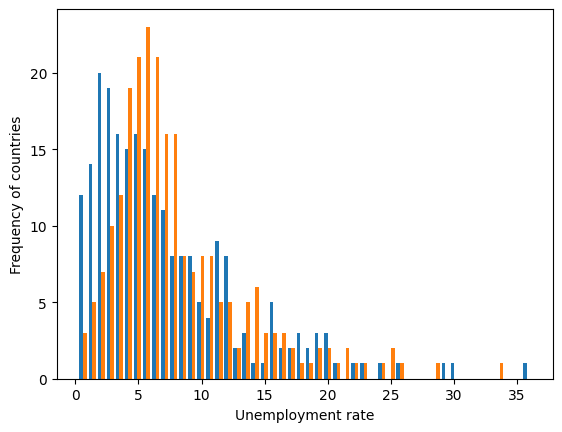

In [7]:
plt.hist([unemployed['1991'], unemployed['2021']], bins = 50, label=['1991', '2021'])
plt.xlabel('Unemployment rate')
plt.ylabel('Frequency of countries')
plt.show()

## 2 d)
The dataset we used was in the .csv format, downloaded from Kaggle (https://www.kaggle.com/datasets/pantanjali/unemployment-dataset). There was no missing data of countries, but it would be nice to have another column with the specification if it is just a country or some other group. Indeed, in the dataset there are a lot of specific groups of countries like 'high income countries'. The source of the data is the data.worldbank and there is one collaborator named Anjali pant. Summing up we could analyse and plot the data with no or small transformation of the data. Maybe there could have been a categorization between the countries and groups. Furthermore most of the groups of countries are different and usually not comparable.

## Excercise 3

Cleaning up the data by dropping unneeded column, transposing it and setting the year as the index so that data can be plotted more easily:

In [8]:
df = unemployed.drop(columns=["Country Code"])
df = df.set_index("Country Name").transpose()
df.index.names = ["Year"]
df.columns.names = ["Country/Region/Grouping"]
df.head()

Country/Region/Grouping,Africa Eastern and Southern,Afghanistan,Africa Western and Central,Angola,Albania,Arab World,United Arab Emirates,Argentina,Armenia,Australia,...,"Venezuela, RB",Virgin Islands (U.S.),Vietnam,Vanuatu,World,Samoa,"Yemen, Rep.",South Africa,Zambia,Zimbabwe
Year,,,,,,,,,,,,,,,,,,,,,
1991,7.80,10.65,4.42,4.21,10.31,11.62,1.87,5.44,1.6,9.58,...,9.45,12.35,2.09,1.68,4.80,2.10,8.32,29.95,18.90,4.94
1992,7.84,10.82,4.53,4.21,30.01,12.12,1.84,6.36,1.8,10.73,...,7.69,12.51,1.91,1.69,4.96,2.38,8.31,29.98,19.37,4.99
1993,7.85,10.72,4.55,4.23,25.26,12.86,1.85,10.10,5.3,10.87,...,6.60,12.70,1.97,1.73,5.23,2.63,8.35,29.92,19.70,4.97
1994,7.84,10.73,4.54,4.16,20.84,12.95,1.81,11.76,6.6,9.72,...,8.56,12.47,1.93,1.59,5.49,3.04,8.34,29.89,18.43,4.96
1995,7.83,11.18,4.53,4.11,14.61,13.32,1.80,18.80,6.7,8.47,...,10.24,12.13,1.90,1.74,5.63,3.19,8.96,29.89,16.81,5.63


Printing all column names (countries) so that the country names can be copied to the cell below for the plotting

In [9]:
print(df.columns.tolist())

['Africa Eastern and Southern', 'Afghanistan', 'Africa Western and Central', 'Angola', 'Albania', 'Arab World', 'United Arab Emirates', 'Argentina', 'Armenia', 'Australia', 'Austria', 'Azerbaijan', 'Burundi', 'Belgium', 'Benin', 'Burkina Faso', 'Bangladesh', 'Bulgaria', 'Bahrain', 'Bahamas, The', 'Bosnia and Herzegovina', 'Belarus', 'Belize', 'Bolivia', 'Brazil', 'Barbados', 'Brunei Darussalam', 'Bhutan', 'Botswana', 'Central African Republic', 'Canada', 'Central Europe and the Baltics', 'Switzerland', 'Channel Islands', 'Chile', 'China', "Cote d'Ivoire", 'Cameroon', 'Congo, Dem. Rep.', 'Congo, Rep.', 'Colombia', 'Comoros', 'Cabo Verde', 'Costa Rica', 'Caribbean small states', 'Cuba', 'Cyprus', 'Czech Republic', 'Germany', 'Djibouti', 'Denmark', 'Dominican Republic', 'Algeria', 'East Asia & Pacific (excluding high income)', 'Early-demographic dividend', 'East Asia & Pacific', 'Europe & Central Asia (excluding high income)', 'Europe & Central Asia', 'Ecuador', 'Egypt, Arab Rep.', 'Euro 

Plotting the unemployment rate over time of selected countries/groupings:

In [28]:
fig = px.line(df[["High income", "Middle income", "Low income", "World"]],
             title="Unemployment rate of selected income groupings over the last 30 years ")
fig.show()

In [30]:
fig2 = px.line(df[["World", "European Union", "Least developed countries: UN classification", "Africa Eastern and Southern", "Africa Western and Central", "East Asia & Pacific"]],
             title="Unemployment rate of selected regions over the last 30 years ")
fig2.show()

 